In [23]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from matplotlib.lines import Line2D

current_directory = os.getcwd()
time = 10000
scheme = 'randomly'
attack_operation_record = pd.read_csv(current_directory+ '\\data_analysis\\attack_operation_record_'+str(time)+'_'+scheme+'.csv')
mtd_operation_record = pd.read_csv(current_directory+'\\data_analysis\\mtd_operation_record_'+str(time)+'_'+scheme+'.csv')

In [24]:
mtd_operation_record.head()

,name,start_time,finish_time,duration,executed_at
0,osdiversity,0.000000,40.088587,40.088587,application
1,HostTopologyShuffle,71.080547,111.117695,40.037148,network
2,PortShuffle,141.277572,181.630153,40.352581,application
3,UserShuffle,213.147237,253.273916,40.126679,reserve
4,PortShuffle,283.207511,323.428503,40.220992,application


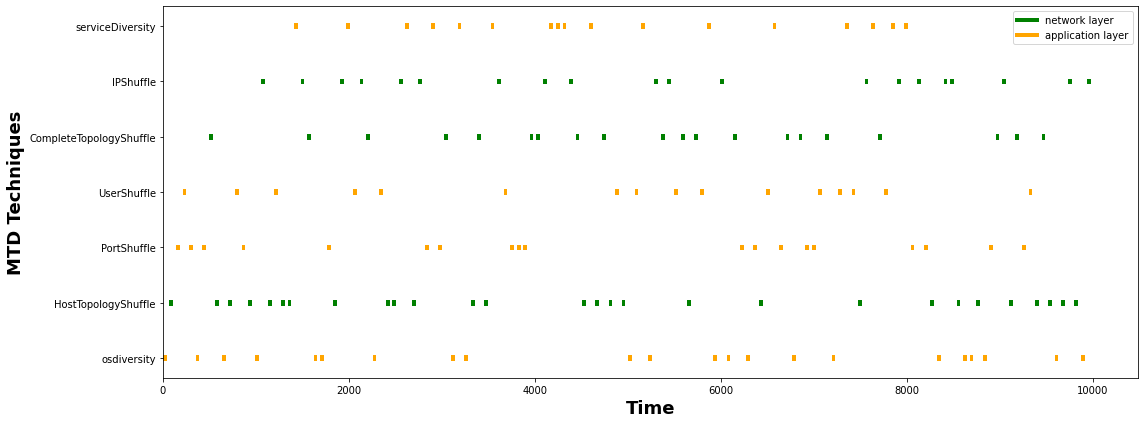

In [25]:
mtd_operation_record['color'] = np.where(mtd_operation_record['executed_at']=='network', 'green', 'orange')
fig, ax = plt.subplots(1, figsize=(16, 6))
ax.barh(mtd_operation_record['name'], mtd_operation_record['duration'], left=mtd_operation_record['start_time'], height=0.1, color=mtd_operation_record['color'])


custom_lines_mtd = [Line2D([0], [0], color='green', lw=4),
                    Line2D([0], [0], color='orange', lw=4)]
ax.legend(custom_lines_mtd, ['network layer', 'application layer'], loc='upper right')
plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('MTD Techniques', weight='bold', fontsize=18)
fig.tight_layout()
plt.savefig('data_analysis/mtd_record.png')
plt.show()

In [26]:
attack_operation_record

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
0,SCAN_HOST,0.000000,10.000000,10.000000,-1,0,0,0,None,[],None,None
1,ENUM_HOST,10.000000,25.000000,15.000000,-1,0,0,0,None,[],None,None
2,SCAN_PORT,25.000000,40.088587,15.088587,0,1,0,0,None,[],application,osdiversity
3,SCAN_PORT,42.088587,62.088587,20.000000,0,1,0,0,None,[],None,None
4,EXPLOIT_VULN,62.088587,87.180923,25.092336,0,1,0,0,None,[],None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
585,SCAN_PORT,9915.152991,9935.152991,20.000000,97,4,575,58,None,[],None,None
586,EXPLOIT_VULN,9935.152991,9960.944677,25.791686,97,4,575,58,97,['Halley'],None,None
587,SCAN_NEIGHBOR,9960.944677,9970.944677,10.000000,97,4,576,59,None,[],None,None
588,ENUM_HOST,9970.944677,9982.824514,11.879837,97,4,576,59,None,[],network,IPShuffle


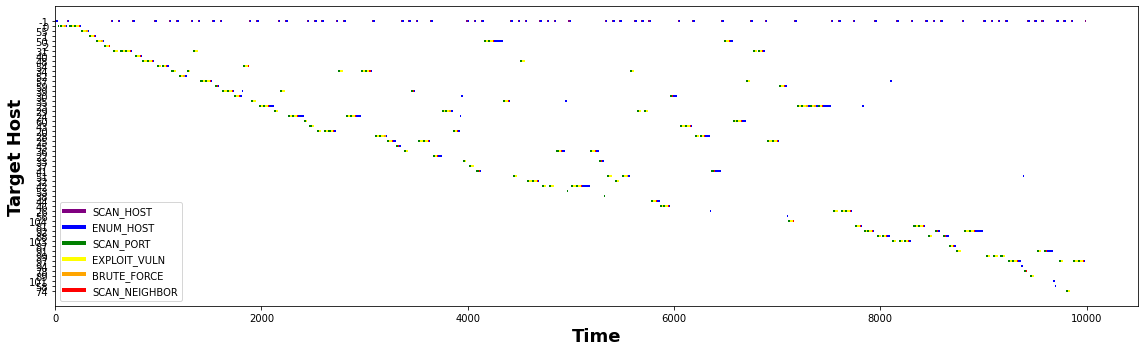

In [27]:
fig2, ax2 = plt.subplots(1, figsize=(16, 5))

colors = ['purple', 'blue', 'green', 'yellow', 'orange', 'red']
attack_action_legend = []
attack_action_legend_name = []
for i, v in enumerate(attack_operation_record['name'].unique()):
    attack_operation_record.loc[attack_operation_record.name == v, 'color'] = colors[i]
    attack_action_legend.append(Line2D([0], [0], color=colors[i], lw=4))
    attack_action_legend_name.append(v)

ax2.barh(attack_operation_record['current_host'].astype(str), attack_operation_record['duration'], left=attack_operation_record['start_time'], height=0.4, color=attack_operation_record['color'] )

ax2.legend(attack_action_legend, attack_action_legend_name, loc='lower left')
plt.gca().invert_yaxis()
plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('Target Host', weight='bold', fontsize=18)
fig2.tight_layout()
plt.savefig('data_analysis/attack_action_record.png')
plt.show()

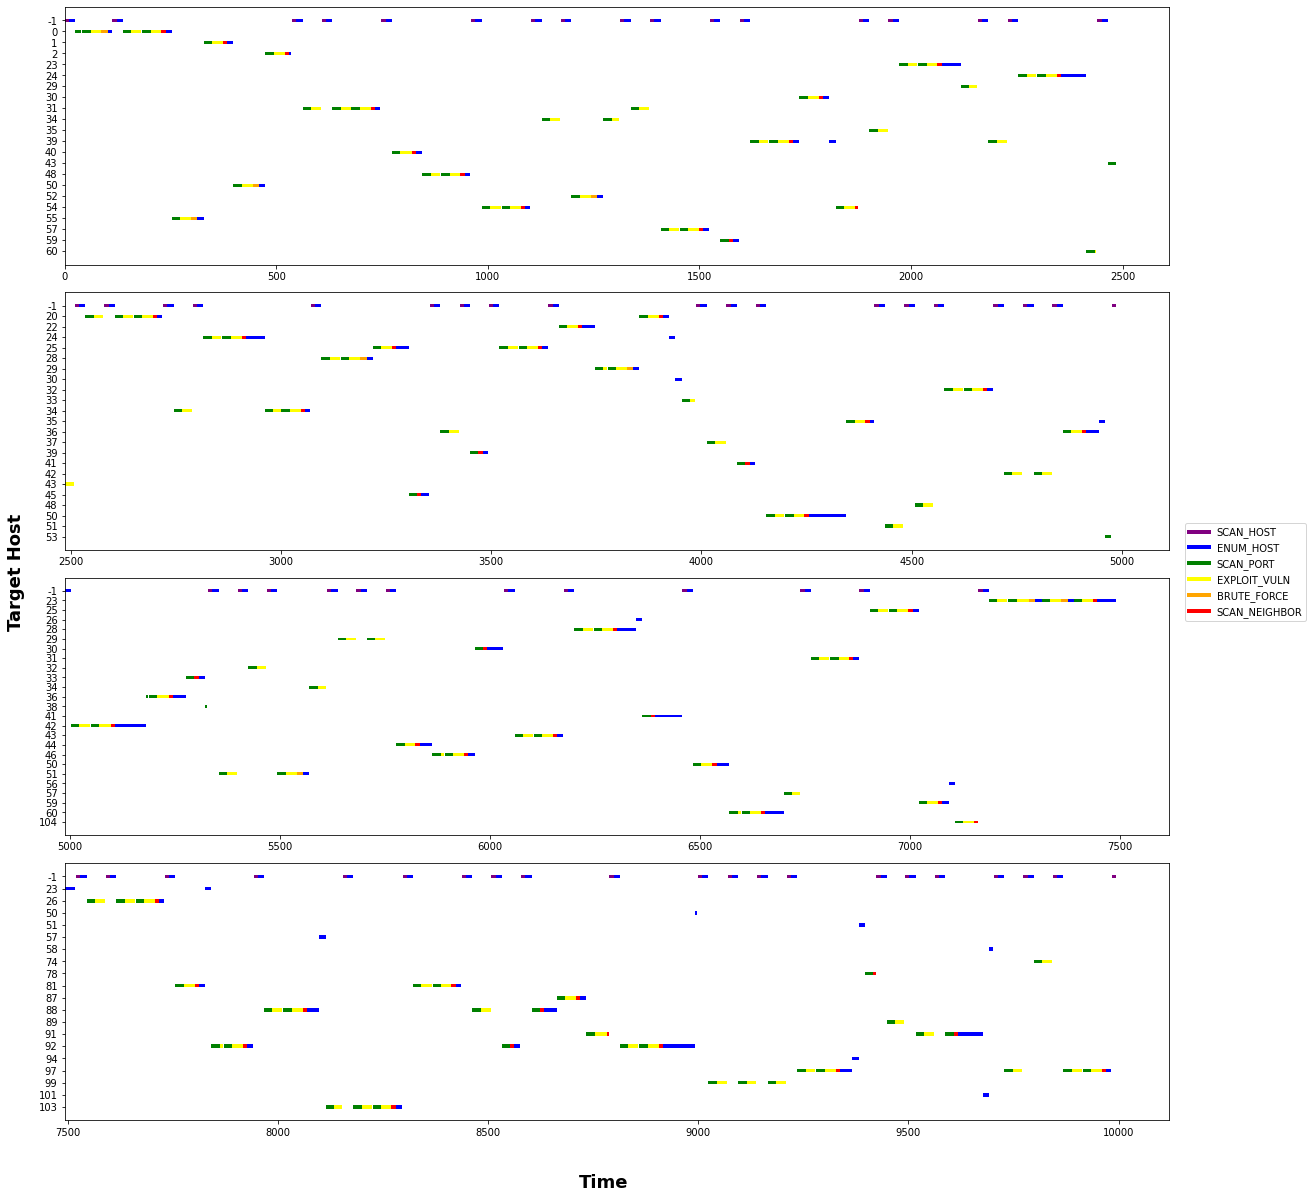

In [28]:
fig3, ax3 = plt.subplots(figsize=(16, 16))

# Set common labels
fig3.text(0.5, -0.03, 'Time', ha='center', va='center', weight='bold', fontsize=18)
fig3.text(-0.01, 0.5, 'Target Host', ha='center', va='center', rotation='vertical', weight='bold', fontsize=18)
fig3.legend(attack_action_legend, attack_action_legend_name, loc='center left', bbox_to_anchor=(1, 0.5))

for i in [1,2,3,4]:
    plt.subplot(4, 1, i)
    sub_record = attack_operation_record[(attack_operation_record['finish_time']<=int(time * i/4)) & (attack_operation_record['finish_time'] > int(time * (i-1)/4))]
    sub_record = sub_record.sort_values(by=['current_host'])
    plt.barh(y=sub_record['current_host'].astype(str), width=sub_record['duration'], left=sub_record['start_time'], height=0.3, color=sub_record['color'])
    plt.gca().invert_yaxis()

plt.tight_layout()
plt.savefig('data_analysis/attack_action_record_subplots.png', bbox_inches="tight")
plt.show()
# how to combine different MTD techniques
# executed at the same time / alternatively / randomly / at different rates
# implement same time execution MTDs at fixed interval
# individual/ subnet / full

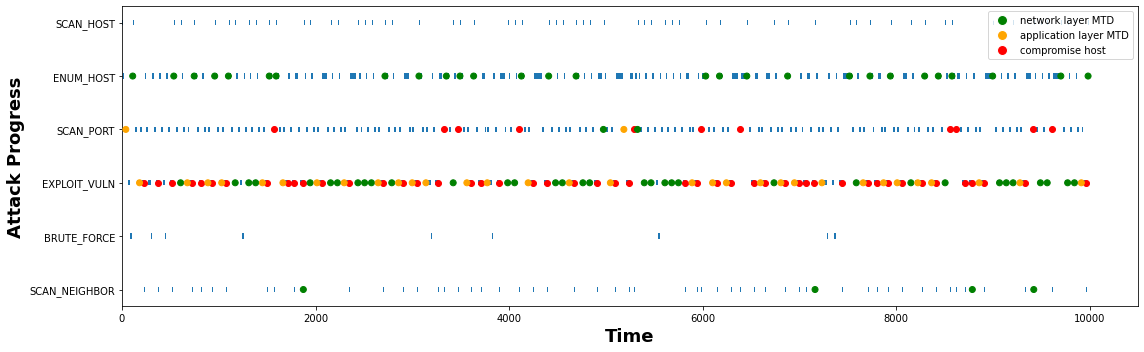

In [29]:
fig4, ax4 = plt.subplots(1, figsize=(16, 5))
ax4.barh(attack_operation_record['name'], attack_operation_record['duration'], left=attack_operation_record['start_time'], height=0.1, zorder=1)


interrupted_record = attack_operation_record[attack_operation_record['interrupted_in']!='None']
interrupted_record['color'] = np.where(interrupted_record['interrupted_in']=='network', 'green', 'orange')
ax4.scatter(interrupted_record['finish_time'], interrupted_record['name'], color=interrupted_record['color'], zorder=3)


compromise_record = attack_operation_record[attack_operation_record['compromise_host'] != 'None']
ax4.scatter(compromise_record['finish_time'], compromise_record['name'], color='red', zorder=2)


custom_lines_attack = [Line2D([0], [0], marker='o',color='w', markerfacecolor='green', markersize=10),
                       Line2D([0], [0], marker='o',color='w', markerfacecolor='orange', markersize=10),
                       Line2D([0], [0], marker='o',color='w', markerfacecolor='red', markersize=10),]

ax4.legend(custom_lines_attack, ['network layer MTD', 'application layer MTD', 'compromise host'], loc='upper right')

plt.gca().invert_yaxis()
plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('Attack Progress', weight='bold', fontsize=18)
fig4.tight_layout()
plt.savefig('data_analysis/attack_record.png')
plt.show()

In [30]:
attack_operation_record[(attack_operation_record['name'] == 'SCAN_PORT') & (attack_operation_record['compromise_host'] != 'None')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by,color
89,SCAN_PORT,1549.192716,1569.192716,20.0,59,1,289,8,59,"['Jeannette', 'Cordie', 'Raven', 'Emmy']",None,None,green
190,SCAN_PORT,3303.788059,3323.788059,20.0,45,1,376,18,45,"['Wilona', 'Emili', 'Mirna']",None,None,green
200,SCAN_PORT,3449.650759,3469.650759,20.0,39,4,376,19,39,"['Tarah', 'Corri', 'Arleta']",None,None,green
238,SCAN_PORT,4084.361049,4104.361049,20.0,41,1,393,23,41,['Paloma'],None,None,green
309,SCAN_PORT,5275.971692,5295.971692,20.0,33,2,449,30,33,[],None,None,green
350,SCAN_PORT,5963.864109,5983.864109,20.0,30,3,479,33,30,"['Elora', 'Theresa']",None,None,green
374,SCAN_PORT,6363.215791,6383.215791,20.0,41,2,510,36,41,"['Louisa', 'Norene', 'Joye']",None,None,green
501,SCAN_PORT,8532.737214,8552.737214,20.0,92,2,562,50,92,"['Nickie', 'Leena']",None,None,green
506,SCAN_PORT,8603.242591,8623.242591,20.0,88,4,562,51,88,['Florry'],None,None,green
553,SCAN_PORT,9396.601776,9416.601776,20.0,78,1,575,56,78,[],None,None,green


In [31]:
attack_operation_record[(attack_operation_record['name'] == 'EXPLOIT_VULN') & (attack_operation_record['compromise_host'] != 'None')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by,color
12,EXPLOIT_VULN,203.630153,228.651104,25.020951,0,2,14,0,0,"['Dre', 'Prudi', 'Concettina', 'Hailee', 'Amal...",None,None,yellow
20,EXPLOIT_VULN,348.719239,374.030482,25.311243,1,1,47,1,1,"['Meggi', 'Dasie', 'Chloette', 'Hilliary', 'Sh...",None,None,yellow
28,EXPLOIT_VULN,494.835724,519.962457,25.126733,2,1,116,2,2,"['Kameko', 'Elizabet', 'Storm', 'Agnola', 'Gab...",None,None,yellow
40,EXPLOIT_VULN,697.740996,723.111312,25.370316,31,2,157,3,31,"['Star', 'Ferdinande', 'Donna', 'Winnah']",None,None,yellow
46,EXPLOIT_VULN,793.430172,820.102190,26.672018,40,1,170,4,40,"['Marguerite', 'Lina', 'Milli', 'Tamara']",None,None,yellow
52,EXPLOIT_VULN,909.995150,935.335763,25.340613,48,1,194,5,48,"['Nicoli', 'Lexy', 'Lulu', 'Fiann', 'Mersey']",None,None,yellow
60,EXPLOIT_VULN,1052.510803,1078.299245,25.788442,54,1,231,6,54,"['Frankie', 'Glennie', 'Polly', 'Georgiana']",None,None,yellow
84,EXPLOIT_VULN,1473.712840,1499.066089,25.353249,57,1,260,7,57,"['Feodora', 'Joete', 'Andriette']",None,None,yellow
97,EXPLOIT_VULN,1685.248977,1710.723968,25.474991,39,1,289,9,39,"['Jesselyn', 'Olga', 'Iseabal', 'Lizette']",None,None,yellow
101,EXPLOIT_VULN,1755.723968,1781.748328,26.024360,30,1,302,10,30,"['Jeri', 'Katya', 'Yoshi', 'Roxie']",None,None,yellow


In [32]:
attack_operation_record[(attack_operation_record['name'] == 'BRUTE_FORCE') & (attack_operation_record['compromise_host'] != 'None')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by,color
